In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import re
from collections import Counter

In [8]:
import pandas as pd

df = pd.read_xml('/content/drive/MyDrive/IR/Data/kompas-beritaPart1.xml')
df.head()


,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sumber      1502 non-null   object
 1   tanggal     1502 non-null   object
 2   kategori    1502 non-null   object
 3   judul       1502 non-null   object
 4   isi         1502 non-null   object
 5   link        1502 non-null   object
 6   jumlahkata  1502 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 82.3+ KB


In [10]:
df.describe()

,jumlahkata
count,1502.000000
mean,188.886152
std,98.164818
min,10.000000
25%,133.000000
50%,181.000000
75%,235.000000
max,841.000000


In [11]:
df.isnull().sum()

,0
sumber,0
tanggal,0
kategori,0
judul,0
isi,0
link,0
jumlahkata,0


In [12]:
def caseFolding(text):
    text = text.lower()
    return text

contoh = "Terima kasih, Kak! Kamu sudah memberi saya tumpangan."
print(f'original: {contoh}')
print(f'case folded: {caseFolding(contoh)}')

original: Terima kasih, Kak! Kamu sudah memberi saya tumpangan.
case folded: terima kasih, kak! kamu sudah memberi saya tumpangan.


In [13]:
import re

def punctuationRemoval(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

contoh = "Terima kasih, Kak! Kamu sudah memberi saya tumpangan."
print(f'original: {contoh}')
print(f'punctuation removed: {punctuationRemoval(contoh)}')

original: Terima kasih, Kak! Kamu sudah memberi saya tumpangan.
punctuation removed: Terima kasih Kak Kamu sudah memberi saya tumpangan


In [14]:
df['clean'] = df['isi'].apply(caseFolding)
df['clean'] = df['clean'].apply(punctuationRemoval)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...


In [15]:
def tokenize(text):
    return text.split(" ")

contoh = "Terima kasih, Kak! Kamu sudah memberi saya tumpangan."
print(f'original: {contoh}')

clean = caseFolding(contoh)
clean = punctuationRemoval(clean)
print(f'tokenized: {tokenize(clean)}')

original: Terima kasih, Kak! Kamu sudah memberi saya tumpangan.
tokenized: ['terima', 'kasih', 'kak', 'kamu', 'sudah', 'memberi', 'saya', 'tumpangan']


In [16]:
df['tokens']=df['clean'].apply(tokenize)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean,tokens
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...,"[jakarta, kompascom, , ponsel, android, huawei..."
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...,"[jakarta, kompascom, , sejak, 2013, wacana, te..."
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...,"[jakarta, kompascom, danis, darusman, pelangga..."
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...,"[kompascom, salah, satu, momok, yang, dihadapi..."
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...,"[jakarta, kompascom, , resmi, diperkenalkan, p..."


In [17]:
from collections import Counter
import pandas as pd

all_token = []
for tokens in df['tokens']:
    for token in tokens:
        all_token.append(token)

term_freq = Counter(all_token)
term_freq_df = pd.DataFrame(term_freq.items(), columns=['term', 'freq'])
term_freq_df_sorted = term_freq_df.sort_values(by='freq', ascending=False)
term_freq_df_sorted.head()

,term,freq
133,yang,6450
10,di,5824
126,dan,4915
2,,4264
35,ini,2744


In [18]:
term_freq_df_sorted['rank'] = term_freq_df_sorted['freq'].rank(method='first', ascending=False).astype(int)
term_freq_df_sorted.head()

,term,freq,rank
133,yang,6450,1
10,di,5824,2
126,dan,4915,3
2,,4264,4
35,ini,2744,5


In [19]:
term_freq_df_sorted['k = f * r']= term_freq_df_sorted['freq'] * term_freq_df_sorted['rank']
term_freq_df_sorted.head(n=10)

,term,freq,rank,k = f * r
133,yang,6450,1,6450
10,di,5824,2,11648
126,dan,4915,3,14745
2,,4264,4,17056
35,ini,2744,5,13720
23,dengan,2625,6,15750
29,untuk,2583,7,18081
31,dari,2460,8,19680
18,itu,2437,9,21933
97,akan,2055,10,20550


In [20]:
tf_sorted_rank = term_freq_df_sorted.sort_values(by='rank', ascending=True)
tf_sorted_rank.head(10)

,term,freq,rank,k = f * r
133,yang,6450,1,6450
10,di,5824,2,11648
126,dan,4915,3,14745
2,,4264,4,17056
35,ini,2744,5,13720
23,dengan,2625,6,15750
29,untuk,2583,7,18081
31,dari,2460,8,19680
18,itu,2437,9,21933
97,akan,2055,10,20550


In [21]:
with open("/content/drive/MyDrive/IR/Data/kompas-beritaPart1.xml", "r", encoding="utf-8") as f:
    data = f.read()

In [22]:
teks_bersih = re.sub(r'[^\w\s]', '', data.lower())

In [23]:
kata_list = teks_bersih.split()

In [24]:
frekuensi = Counter(kata_list)

In [25]:
kata_urut = sorted(frekuensi.items(), key=lambda x: x[1])

In [26]:
kata_terendah_10 = kata_urut[:10]

In [27]:
print("10 Kata dengan Frekuensi Terendah:\n")
for kata, jumlah in kata_terendah_10:
    print(f"{kata}: {jumlah} kali")


10 Kata dengan Frekuensi Terendah:

xml: 1 kali
version10: 1 kali
data_beritaberitasumberkompascomsumbertanggal20150701tanggalkategoriteknologikategorijudulponsel: 1 kali
jutajudulisijakarta: 1 kali
jutakami: 1 kali
department: 1 kali
jakartaponsel: 1 kali
kirin: 1 kali
pembuatanya: 1 kali
hisilicon: 1 kali


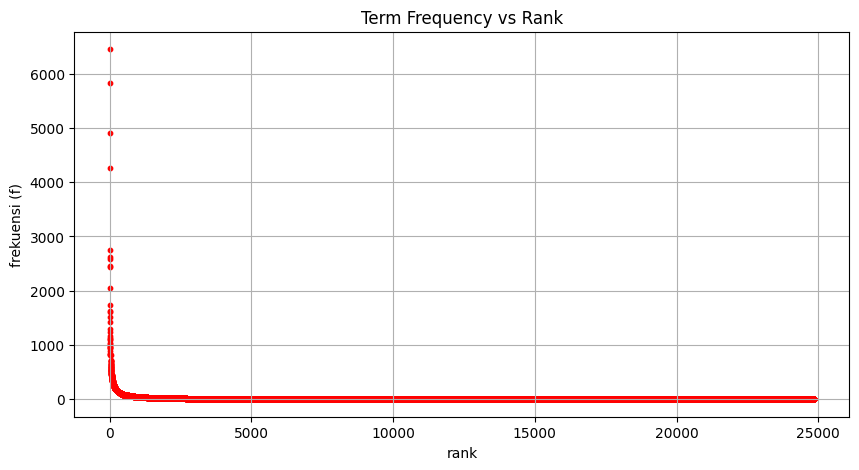

In [28]:
import matplotlib.pyplot as plt

rank = term_freq_df_sorted['rank']
freq = term_freq_df_sorted['freq']
plt.figure(figsize=(10, 5))
plt.scatter(rank, freq, color='red', s=10)
plt.title("Term Frequency vs Rank")
plt.xlabel("rank")
plt.ylabel("frekuensi (f)")

plt.grid(True)
plt.show()

In [29]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [30]:
tree = ET.parse("/content/drive/MyDrive/IR/Data/kompas-beritaPart1.xml")
root = tree.getroot()

In [31]:
teks = "Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta"
for elem in root.iter():
    if elem.text:
        teks += elem.text + "Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta "

In [32]:
teks_bersih = re.sub(r'[^\w\s]', '', teks.lower())

In [33]:
kata_list = teks_bersih.split()

In [34]:
frekuensi = Counter(kata_list)

In [35]:
kata_terbanyak = frekuensi.most_common(20)

In [36]:
kata, jumlah = zip(*kata_terbanyak)

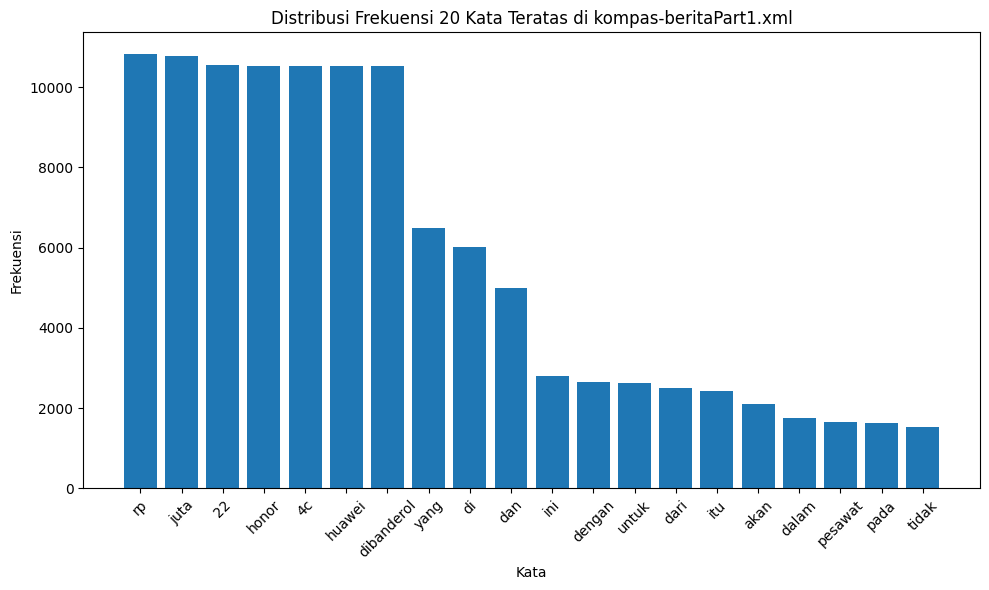

In [37]:
plt.figure(figsize=(10,6))
plt.bar(kata, jumlah)
plt.xticks(rotation=45)
plt.title("Distribusi Frekuensi 20 Kata Teratas di kompas-beritaPart1.xml")
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
import xml.etree.ElementTree as ET

In [39]:
tree = ET.parse("/content/drive/MyDrive/IR/Data/kompas-beritaPart1.xml")
root = tree.getroot()

In [40]:
teks = "Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta"
for elem in root.iter():
    if elem.text:
        teks += elem.text + " Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta"

In [41]:
teks_bersih = re.sub(r'[^\w\s]', '', teks.lower())
kata_list = teks_bersih.split()

In [42]:
frekuensi = Counter(kata_list)
freq_values = sorted(frekuensi.values(), reverse=True)

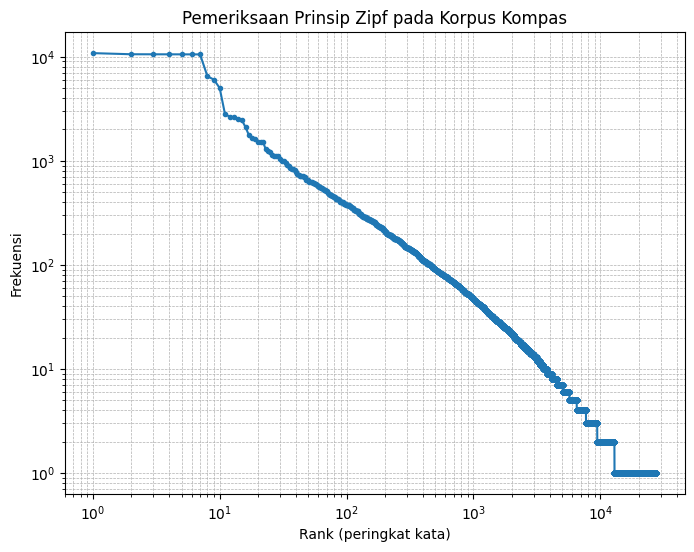

In [43]:
rank = np.arange(1, len(freq_values) + 1)

plt.figure(figsize=(8,6))
plt.loglog(rank, freq_values, marker=".")
plt.title("Pemeriksaan Prinsip Zipf pada Korpus Kompas")
plt.xlabel("Rank (peringkat kata)")
plt.ylabel("Frekuensi")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()